In [1]:
from skimage import measure
from skimage.draw import ellipsoid

import trimesh as tri
import matplotlib.pyplot as plt

import numpy as np
from analysis_code.Mesh.curvature import *
import pymesh
from analysis_code.lib.utils import *
from matplotlib import cm
from analysis_code.Mesh.Mesh import *

%matplotlib notebook

# Split triangle demonstration

<IPython.core.display.Javascript object>


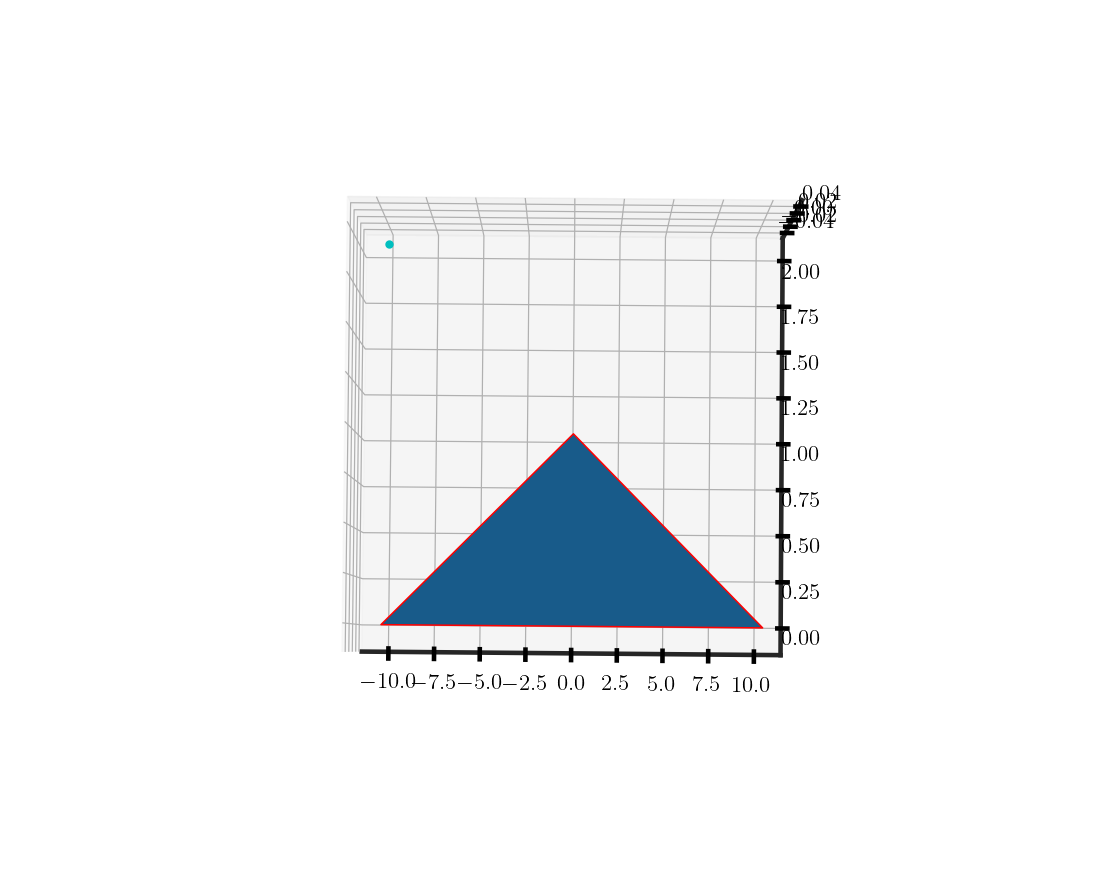

In [114]:
points = np.array([[0,1,0],[10,0,0], [-10,0,0]])
e1 = points[1] - points[0]
e2 = points[2] - points[0]
offset = np.dot(e1, e2) * e1/(e1**2).sum()
offset = points[0] + offset

simples = np.array([0,1,2])
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(points[:,0], points[:,1], points[:,2], triangles=simples, edgecolor='r')
ax.scatter(offset[0], offset[1], offset[2],c='c')

# Generate an artificial sphere

In [5]:
box = np.array([15,15,15])
space = 20
X,Y,Z = np.meshgrid(np.linspace(0,box[0],space), np.linspace(0,box[1],space), np.linspace(0,box[2],space))
spacing = box/space
u = (X-box[0]/2)**2 + (Y-box[1]/2)**2 + (Z-box[2]/2)**2 - 3**2 
verts, faces, _, _ = measure.marching_cubes(u, 0)
verts = verts * spacing - box/2

In [6]:
t = tri.Trimesh(vertices=verts, faces=faces, process=False)

In [7]:
t.export("sphere.ply")

b'ply\nformat binary_little_endian 1.0\ncomment https://github.com/mikedh/trimesh\nelement vertex 264\nproperty float x\nproperty float y\nproperty float z\nelement face 524\nproperty list uchar int vertex_indices\nend_header\n\xd6#J\xc0\x00\x00@\xbf\x00\x00@\xbf\x00\x00@\xc0\xba\x1e\xb1\xbf\x00\x00@\xbf\x00\x00@\xc0\x00\x00@\xbf\xba\x1e\xb1\xbf\xd6#J\xc0\x00\x00@\xbf\x00\x00\x00\x00\x00\x00@\xc0\xba\x1e\xb1\xbf\x00\x00\x00\x00\x00\x00@\xc0\x00\x00@\xbft="?\xd6#J\xc0\x00\x00\x00\x00\x00\x00@\xbf\x00\x00@\xc0\x00\x00\x00\x00\xba\x1e\xb1\xbf\xd6#J\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xc0\x00\x00\x00\x00t="?\x00\x00@\xc0t="?\x00\x00@\xbf\x00\x00@\xc0t="?\x00\x00\x00\x00\x1f\x85\x1d\xc0\x00\x00\x10\xc0\x00\x00@\xbf\x00\x00\x10\xc0\x1f\x85\x1d\xc0\x00\x00@\xbf\x00\x00\x10\xc0\x00\x00\x10\xc0\xba\x1e\xb1\xbf\x1f\x85\x1d\xc0\x00\x00\x10\xc0\x00\x00\x00\x00\x00\x00\x10\xc0\x1f\x85\x1d\xc0\x00\x00\x00\x00\x00\x00\x10\xc0\x00\x00\x10\xc0t="?\x1e\x85-\xc0\x00\x00\xc0\xbf\x00\x00\xc0\xbf\x

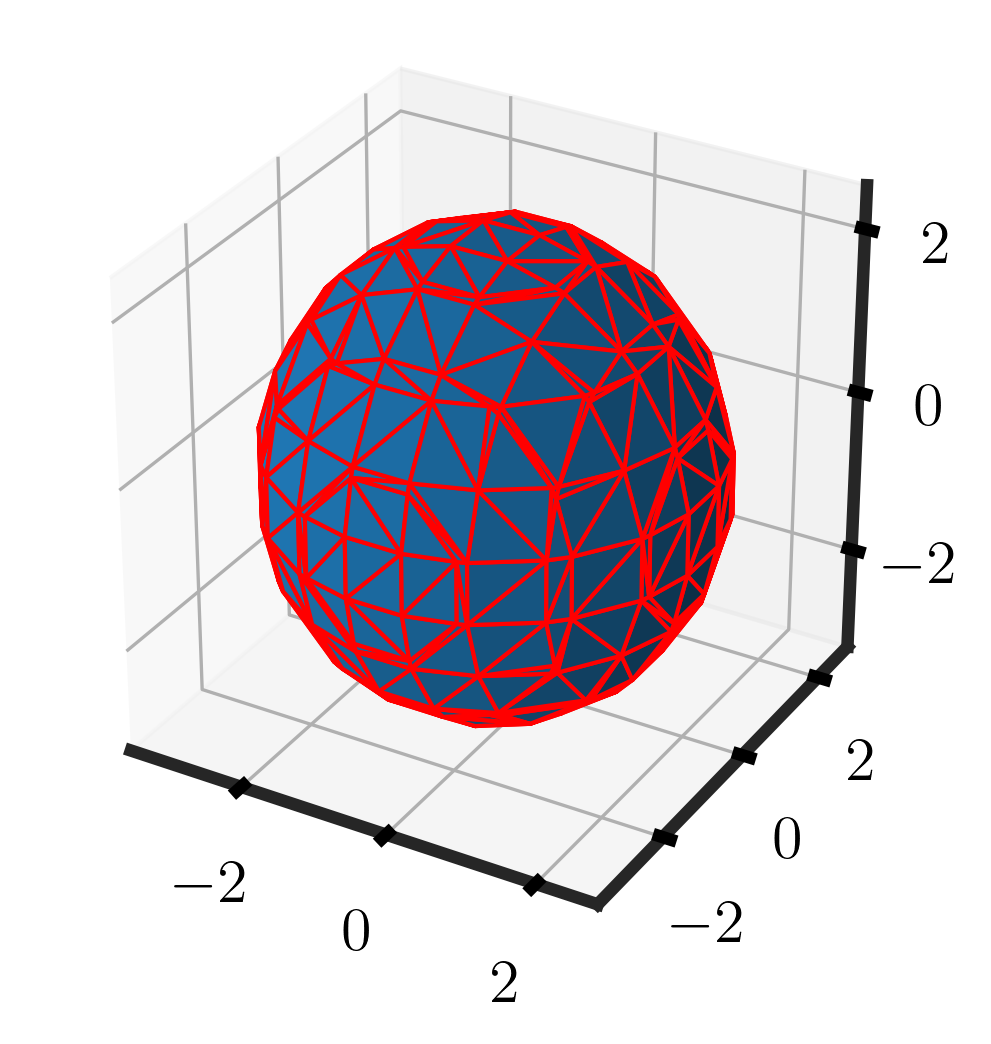

In [17]:
sample_sphere = tri.load_mesh("sphere.ply", process=False)
v,f = sample_sphere.vertices, sample_sphere.faces
fig = plt.figure(dpi=300)
x,y,z = np.linspace(0,4),np.linspace(0,4),np.linspace(0,4)

ax  = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
ax.plot_trisurf(v[:,0], v[:,1], v[:,2],  triangles=f, edgecolors="red")

# Load unsmoothed mesh

<IPython.core.display.Javascript object>


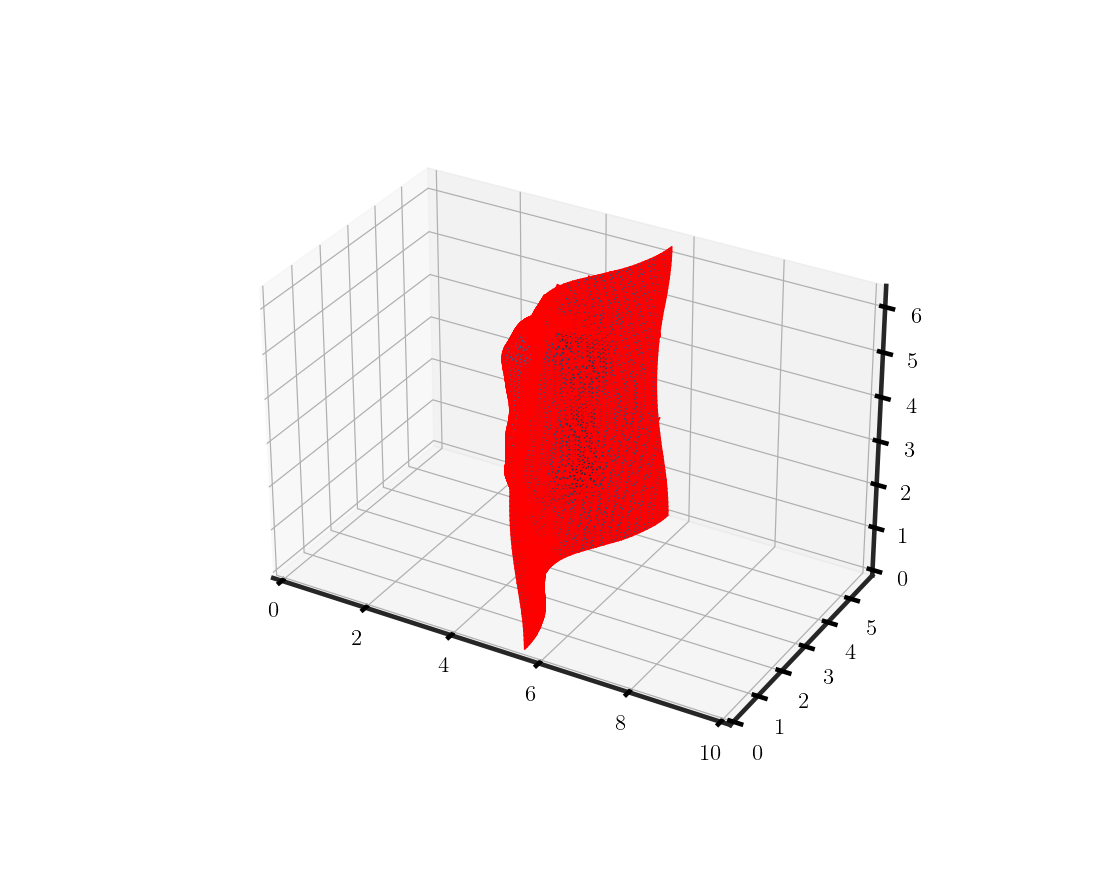

(0.0, 6.33)

In [2]:
m = pymesh.load_mesh("Ice_3200_pbc.ply")
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
x,y,z = np.linspace(0,10,50), np.linspace(0,5.88,50), np.linspace(0,6.33,50)

ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
v,f = m.vertices, m.faces
ax.plot_trisurf(v[:,0], v[:,1], v[:,2],  triangles=f, edgecolors="red")
ax.set_xlim(0,10)
ax.set_ylim(0,5.88)
ax.set_zlim(0,6.33)

# Process unsmoothed mesh

<IPython.core.display.Javascript object>


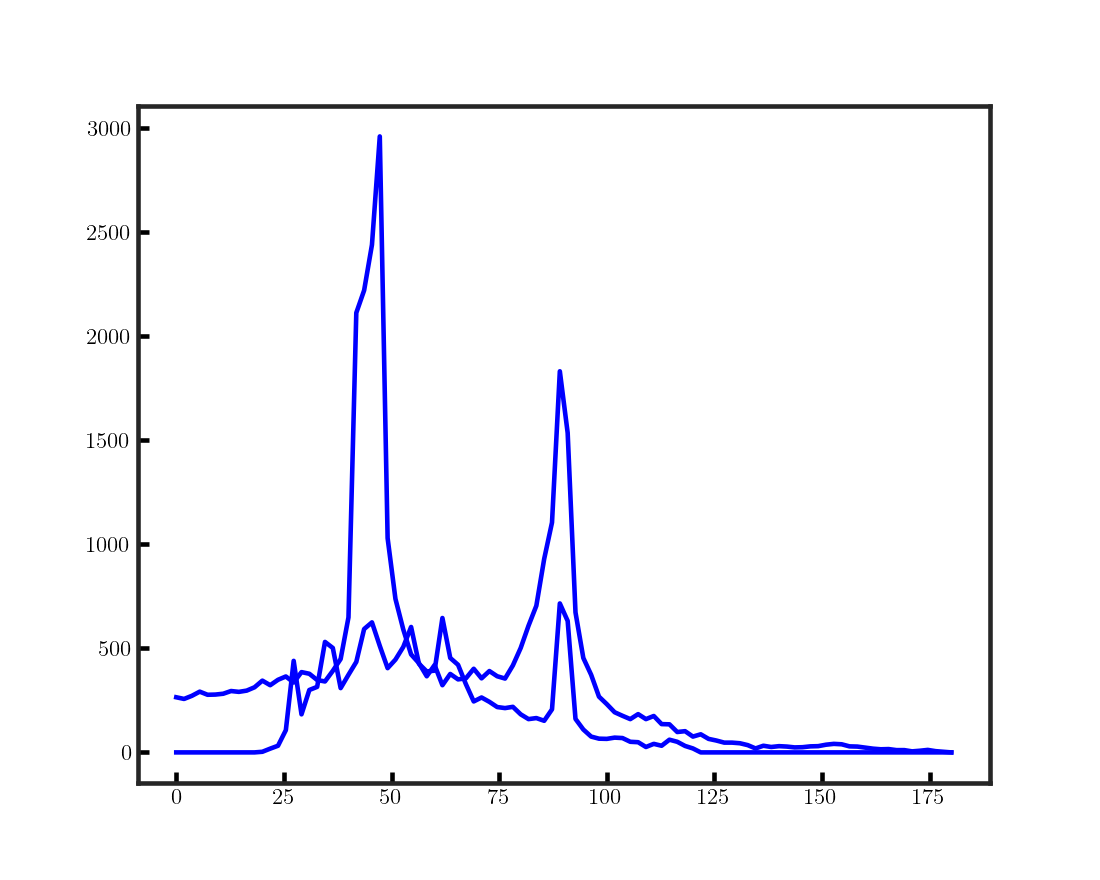

In [37]:
after = read_dat_gen("afterangle.out")
before = read_dat_gen("beforeangle.out")
fig = plt.figure()
ax  = fig.add_subplot(111)
x = np.linspace(0,180,100)
ax.plot(x,after[:,0],c='b')
ax.plot(x,before[:,0],c='b')

#ax.plot(c,d,c='r')

<IPython.core.display.Javascript object>


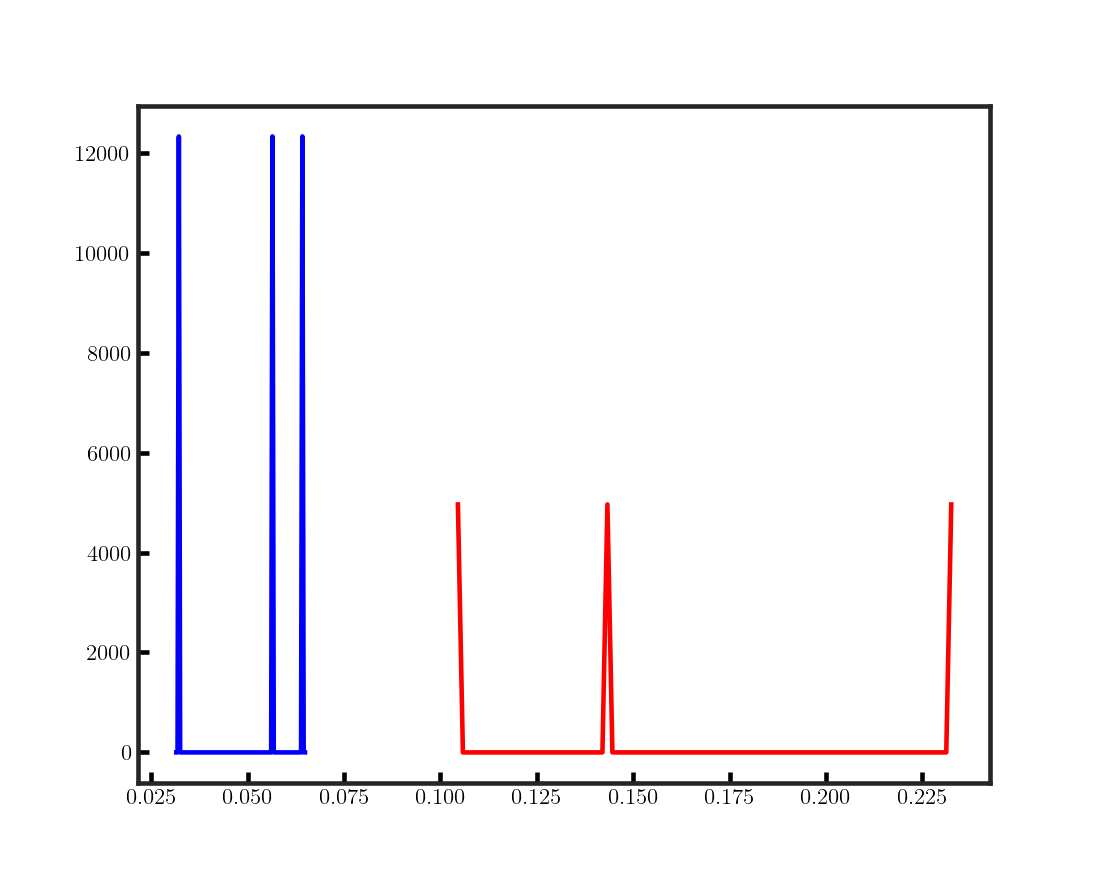

In [33]:
after = read_dat_gen("sideLengthafter.out")
before = read_dat_gen("sideLengthbefore.out")
a,b = make_bins(before, before.min()-1e-3, before.max()+1e-3)
c,d = make_bins(after, after.min()-1e-3, after.max()+1e-3)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(a,b,c='b')
ax.plot(c,d,c='r')

<IPython.core.display.Javascript object>


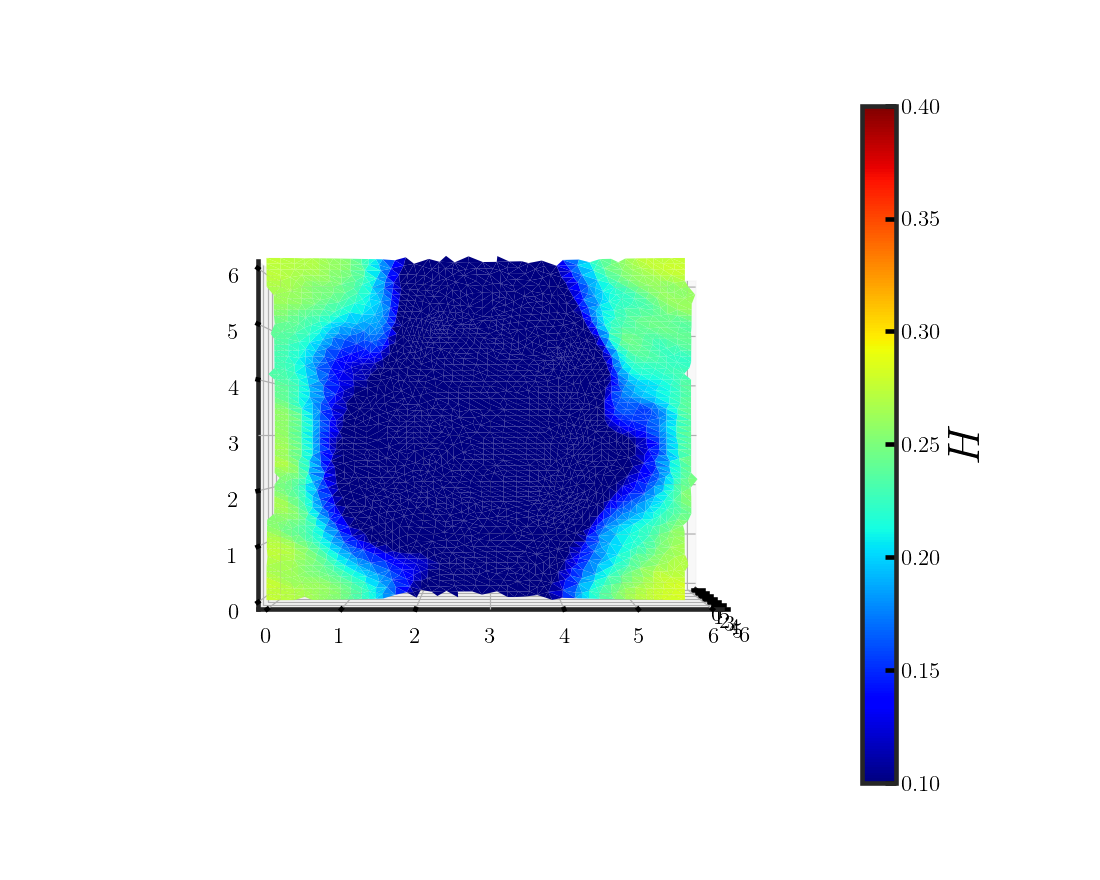

In [11]:
c = read_dat_gen("jetfit_fc.out")
index = read_dat_gen("nonpbc.out").flatten().astype(int)

mesh = pymesh.load_mesh("Ice_3200_s.ply")
v,f = mesh.vertices, mesh.faces
f = f[index]
c = c[index]
m = Poly3DCollection(v[f])

# colorbar stuff
p = cm.ScalarMappable(cmap = cm.jet)
p.set_array([0.1,0.4])
p.set_clim(vmin=0.1,vmax=0.4)
    
colors = p.to_rgba(c[:,1])
m.set_facecolor(colors)
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.add_collection3d(m)

    
ax.set_xlim(0, 6)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 6)  # b = 10
ax.set_zlim(0, 6)  # c = 16
ax.view_init(0,0)

    
cbar = fig.colorbar(p)
cbar.set_label(r"$H$")

<IPython.core.display.Javascript object>


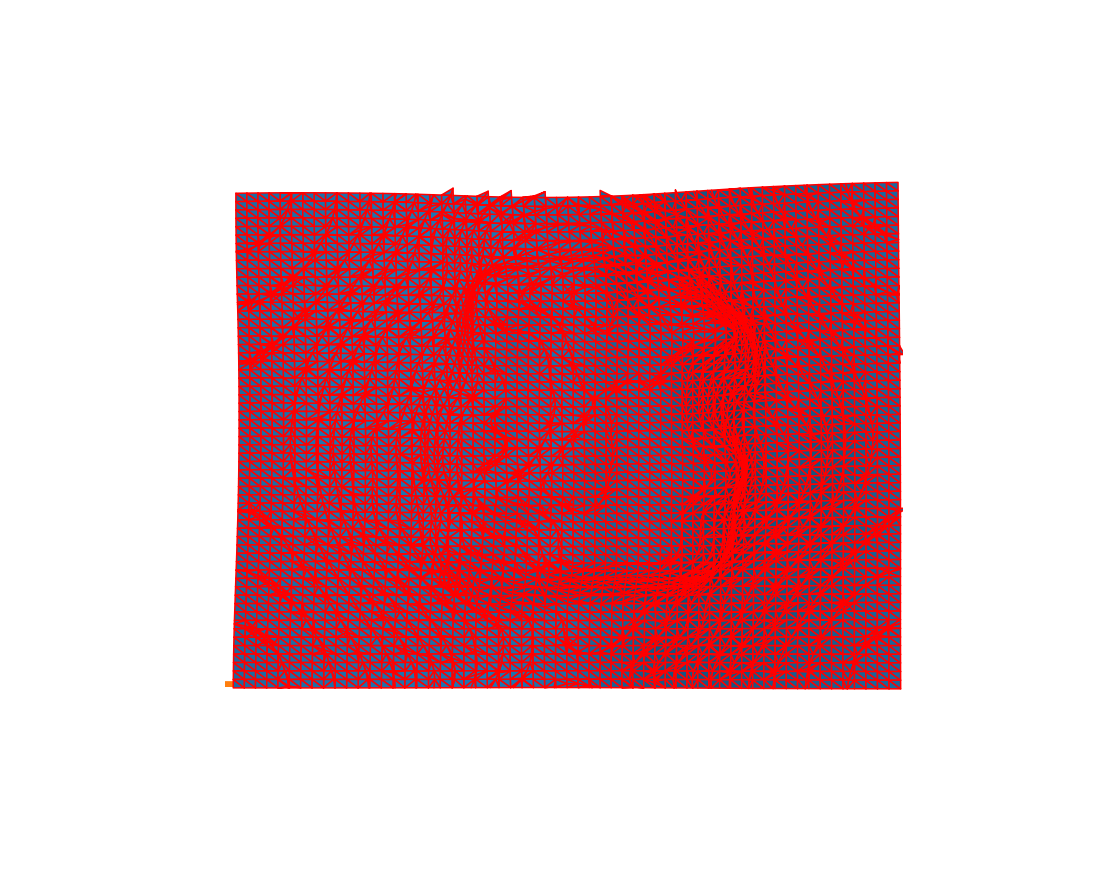

(0.0, 6.33)

In [25]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(m.vertices[:,0], m.vertices[:,1], m.vertices[:,2], triangles=m.faces, edgecolors='r')
ax.set_xlim(0,10)
ax.set_ylim(0,5.88)
ax.set_zlim(0,6.33)

<IPython.core.display.Javascript object>


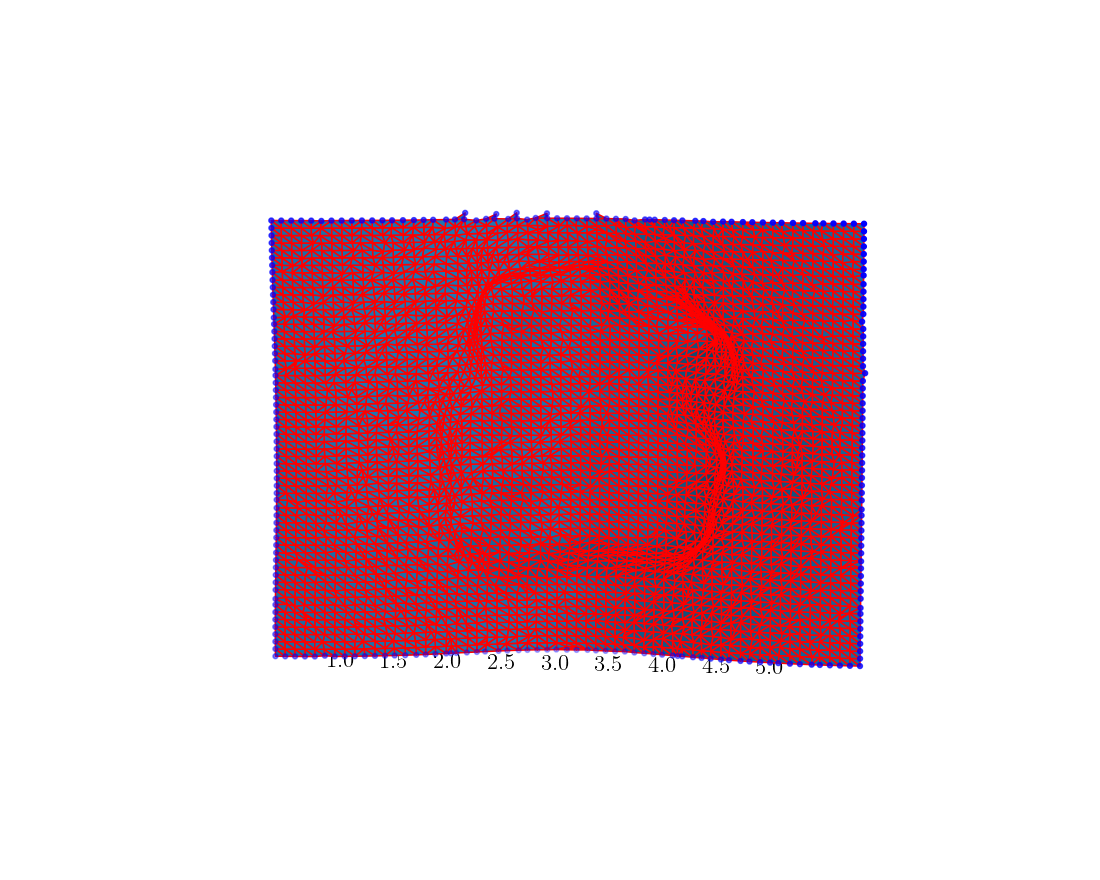

(0.0, 6.33)

In [20]:
m2 = pymesh.load_mesh("processed.ply")
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
b = read_dat_gen("boundary.out")[0].astype(int)
bound_v = m2.vertices[b]
ax.plot_trisurf(m2.vertices[:,0], m2.vertices[:,1], m2.vertices[:,2], triangles=m2.faces, edgecolors='r')
ax.scatter(bound_v[:,0], bound_v[:,1], bound_v[:,2], c='b', s=10)
ax.set_xlim(0,10)
ax.set_ylim(0,5.88)
ax.set_zlim(0,6.33)

In [70]:
m.faces[1728]

array([3515,  640, 3439], dtype=int32)

In [71]:
m.faces[2021]

array([3515, 3439,  640], dtype=int32)

In [42]:
m.vertices[2775]

array([4.733693, 4.526643, 3.6925  ])

In [45]:
m.vertices[1184]

array([4.635   , 4.461645, 3.6925  ])

In [21]:
ms, __ = pymesh.collapse_short_edges(m, 0.05,
            preserve_feature=False);
#ms, __ = pymesh.remove_obtuse_triangles(ms, 120.0, 100);
print(ms.faces.shape)

(8056, 3)


<IPython.core.display.Javascript object>


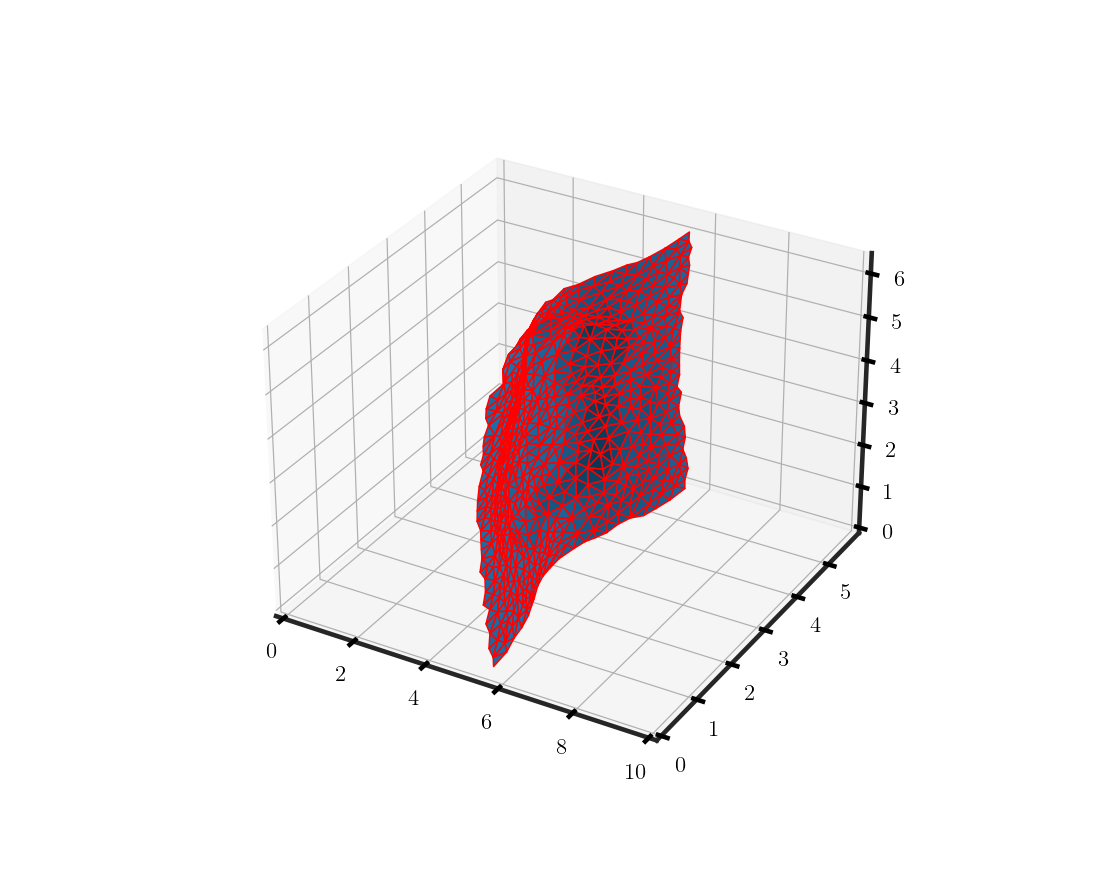

(0.0, 6.33)

In [16]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
v,f = ms.vertices, ms.faces
pymesh.save_mesh("processed.ply", m)
ax.plot_trisurf(v[:,0], v[:,1], v[:,2],  triangles=f, edgecolors="red")
ax.set_xlim(0,10)
ax.set_ylim(0,5.88)
ax.set_zlim(0,6.33)

In [38]:
print(m.num_faces)
mesh, __ = pymesh.remove_degenerated_triangles(m, 100);
print(mesh.num_faces)

12035
12035


In [32]:
ms, __ = pymesh.split_long_edges(m, 0.2)
x,y,z = np.linspace(0,4),np.linspace(0,4),np.linspace(0,4)

target_len=0.2
num_vertices = ms.num_vertices
count = 0
while True:
    ms, __ = pymesh.collapse_short_edges(ms, target_len,
            preserve_feature=True);
    ms, __ = pymesh.remove_obtuse_triangles(ms, 120.0, 100);
    if ms.num_vertices == num_vertices:
        print("count", count)
        print("break")
        break;
    
    num_vertices = ms.num_vertices;
    count += 1;
    if count > 10: break
pymesh.save_mesh("processed.ply", ms)

count 3
break


In [39]:
print(ms.num_faces)
mesh, __ = pymesh.remove_degenerated_triangles(ms, 100);
print(mesh.num_faces)

1214
1214


<IPython.core.display.Javascript object>


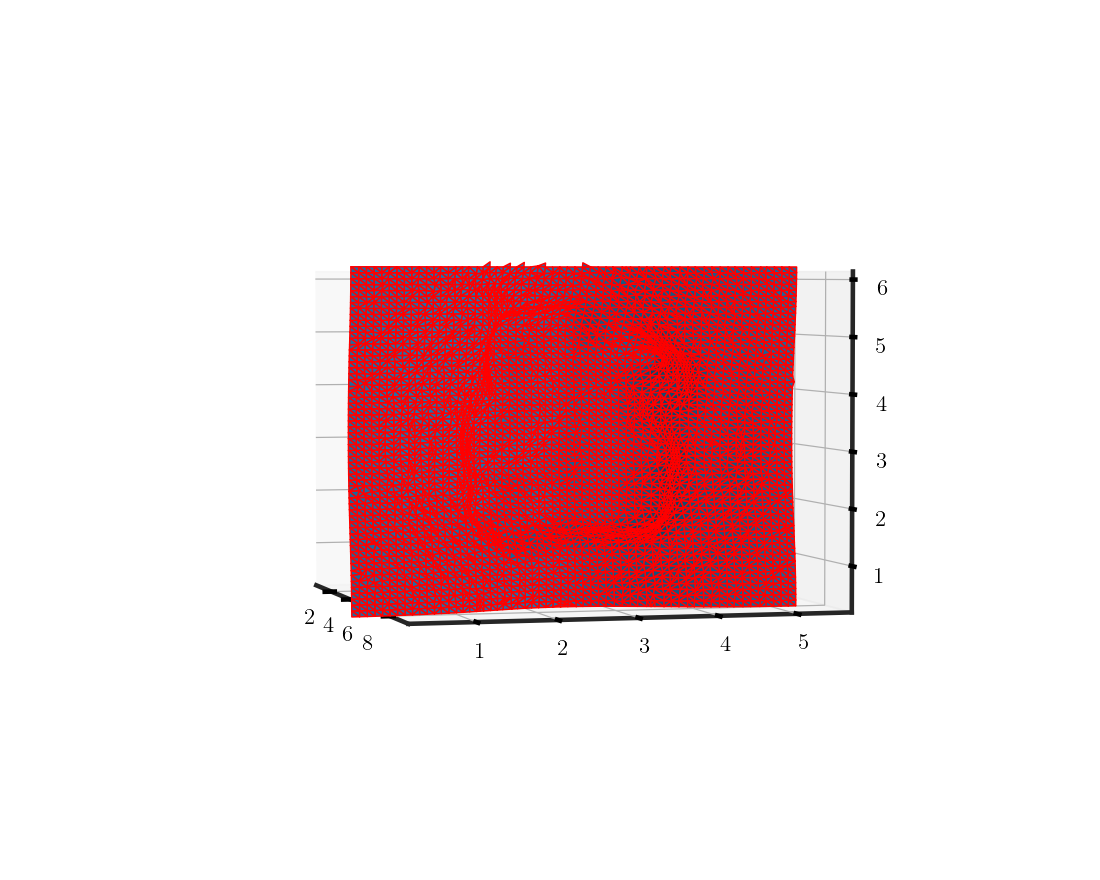

(0.0, 6.33)

In [70]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
v,f = ms.vertices, ms.faces
pymesh.save_mesh("processed.ply", m)
ax.plot_trisurf(v[:,0], v[:,1], v[:,2],  triangles=f, edgecolors="red")
ax.set_xlim(0,10)
ax.set_ylim(0,5.88)
ax.set_zlim(0,6.33)

<IPython.core.display.Javascript object>


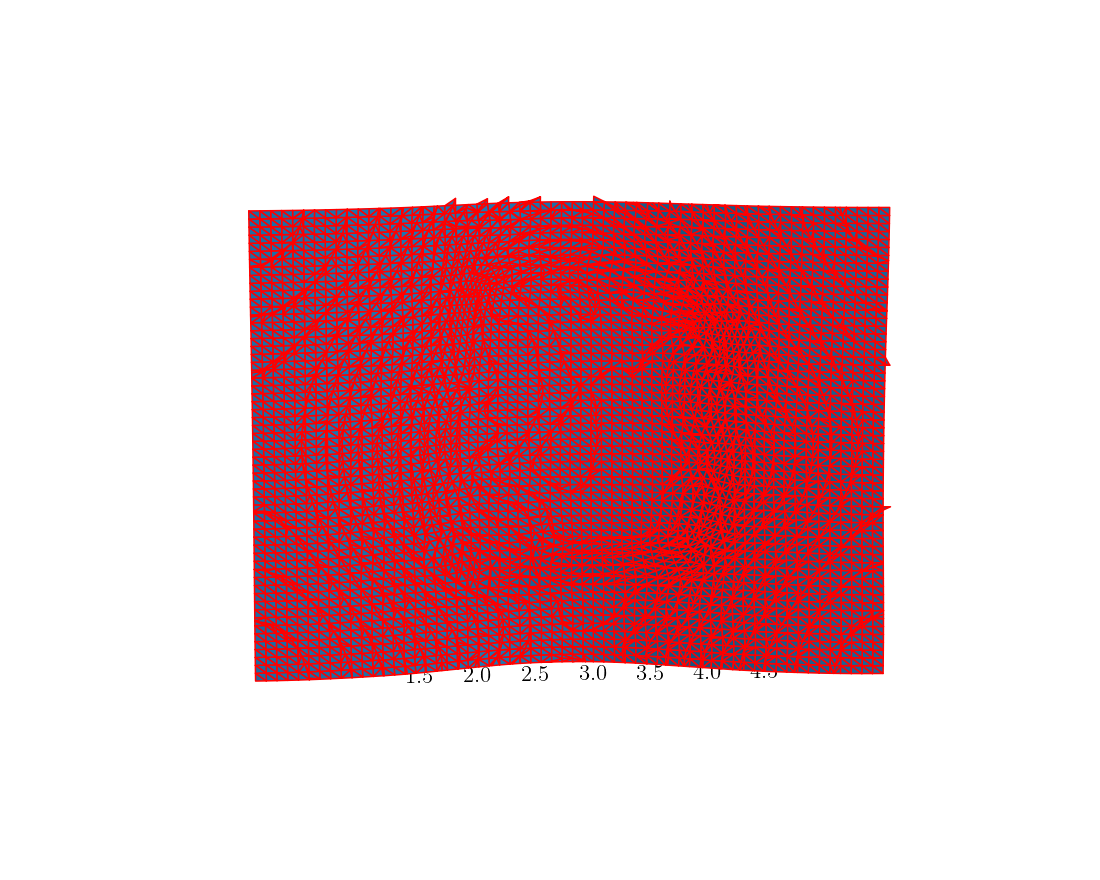

(0.0, 6.33)

In [71]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
mp = pymesh.load_mesh("Ice_3200_s.ply")
v, f = mp.vertices, mp.faces
ax.plot_trisurf(v[:,0], v[:,1], v[:,2],  triangles=f, edgecolors="red")
ax.set_xlim(0,10)
ax.set_ylim(0,5.88)
ax.set_zlim(0,6.33)

In [72]:
ms, __ = pymesh.split_long_edges(mp, 0.2)
x,y,z = np.linspace(0,4),np.linspace(0,4),np.linspace(0,4)

target_len=0.05
num_vertices = ms.num_vertices
count = 0
while True:
    ms, __ = pymesh.collapse_short_edges(ms, target_len,
            preserve_feature=True);
    ms, __ = pymesh.remove_obtuse_triangles(ms, 120.0, 100);
    if ms.num_vertices == num_vertices:
        print("count", count)
        print("break")
        break;
    
    num_vertices = ms.num_vertices;
    count += 1;
    if count > 10: break
pymesh.save_mesh("processed_s.ply", ms)

count 4
break


<IPython.core.display.Javascript object>


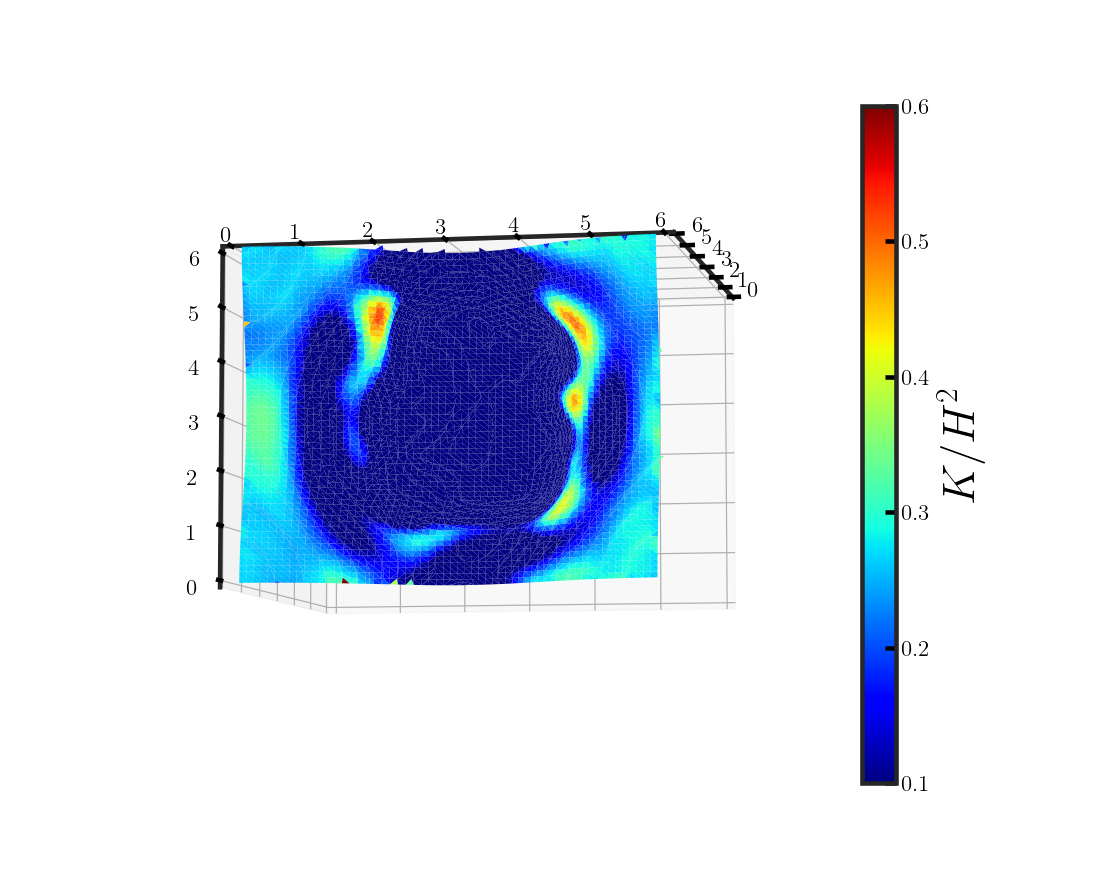

In [77]:
c = read_dat_gen("jetfit_fc.out")

mesh = pymesh.load_mesh("Ice_3200_s.ply")
v,f = mesh.vertices, mesh.faces
m = Poly3DCollection(v[f])

# colorbar stuff
p = cm.ScalarMappable(cmap = cm.jet)
p.set_array([0.1,0.6])
p.set_clim(vmin=0.1,vmax=0.6)
    
colors = p.to_rgba(c[:,1])
m.set_facecolor(colors)
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.add_collection3d(m)

    
ax.set_xlim(0, 6)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 6)  # b = 10
ax.set_zlim(0, 6)  # c = 16
ax.view_init(0,0)

    
cbar = fig.colorbar(p)
cbar.set_label(r"$K/H^{2}$")

In [55]:
c[:,1]

array([-0.949039 , -0.663943 , -0.900804 , ...,  0.0881362,  0.135866 ,
        0.193595 ])